# Анализ продаж компьютерных игр интернет-магазина "Стримчик"

Из открытых источников доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

ТЗ:

1) Изучение общей информации

2) Предобработка данных

3) Исследовательский анализ

    - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    
    - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    
    - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

    - Не учитывайте в работе данные за предыдущие годы.
    
    - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    
    - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    
    - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    
    - Соотнесите выводы с продажами игр на других платформах.
    
    - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
4) Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
5) Проверка гипотез

    ? - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    ? - Средние пользовательские рейтинги жанров Action и Sports разные.

# 1) Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Считаем данные из csv-файла:

In [2]:
df = pd.read_csv('/datasets/games.csv')

Изучим считанные данные:

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу можно заметить, что данные нужно предобработать, так как в них присутствуют пропуски, неправильно названы столбцы, данные имеют некорректный тип данных. Займёмся этим в следующем этапе.

# 2) Предобработка данных

Переименуем столбцы датафрейма согласно стилю snake_style:

In [5]:
df.columns = map(str.lower, df.columns)

Проверим корректность изменений:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразуем стобец `year_of_release` к целочисленному типу, так как номера годов описываются только целыми числами:

In [7]:
df['year_of_release'] = df['year_of_release'].astype(dtype='Int32', errors='ignore')

Кроме того, можно было бы преобразовать все столбцы с типом данных `float64` к `float32` в целях экономии памяти, но так как исходный датафрейм занимает всего 1.4 Мбайт памяти, то это преобразование по-моему излишне

Проверим изменения:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.4+ MB


In [9]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приступим к обработке пропусков:

In [10]:
size_before = df.shape
size_before

(16715, 11)

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим строки датафрейма, в которых есть пропуски в стобцах `name`, `year_of_release`, `genre`:

In [12]:
df = df[~(df['name'].isna()) & ~(df['genre'].isna()) & ~(df['year_of_release'].isna())]

In [13]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [14]:
print(f'{df.shape[0] / size_before[0] * 100:.3f}% данных осталось после удаления')

98.379% данных осталось после удаления


Так как осталось более 90% исходных данных, дальнейший анализ будет корректен

Заполнять пропуски в столбцах `critic_score`, `user_score`, `raiting` не целесообразно, так как игры в целом вещь разнообразная и оценивать пропуски на основе данных о других играх будет неправильным решением. Удалить же эти пропуски нельзя, так как потеряется бо́льшая часть данных

К пропускам чаще всего приводит человеческий фактор: будь то ошибка в коде или неправильное заполнение данных вручную

Так же в столбце `user_score` можно заметить значение `"tbd"`, которое значит: "To Be Determined (будет определено)". Значение `"tbd"` можно расценивать как пропуск:

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

Приведём столбец `user_score` к вещественному типу:

In [16]:
df['user_score'] = df['user_score'].astype(dtype='float', errors='ignore')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.5+ MB


In [18]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Можно заметить, что в последних трёх столбцах примерно половина пропусков, но я считаю что хоть данных и будет меньше, но их всё равно будет хватать для анализа, это лучше чем строить анализ по данным, в достоверности которых мы не уверены

Проведём поиск явных дубликатов:

In [19]:
df.duplicated().sum()

0

Выполним поиск неявных дубликатов (совпадающие по названию, платформе и году релиза одновременно):

In [20]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [21]:
df.shape

(16444, 11)

In [22]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
df.shape

(16443, 11)

Посчитаем суммарные продажи во всех регионах (NA, EU, JP):

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Вывод по разделу:

    - переименованы столбцы
    - данные приведены к правильным типам
    - удалены некоторые строки
    - обработано значение "tbd"
    - удалены неявные дубликаты

# 3) Исследовательский анализ данных

Изучим сколько игр выпускалось в разные годы:

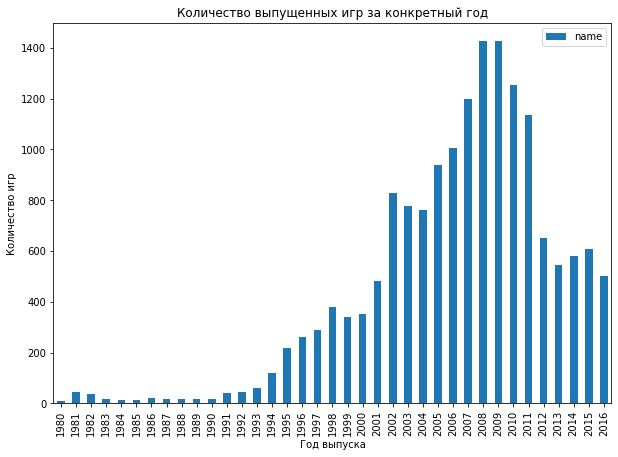

In [25]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(10, 7), title='Количество выпущенных игр за конкретный год').set(xlabel='Год выпуска', ylabel='Количество игр')
plt.show()

Судя по графику, можно сказать, что до 2000-х годов производство игр не было столь массовым - данные за этот не сильно влияют на общее положение дел

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

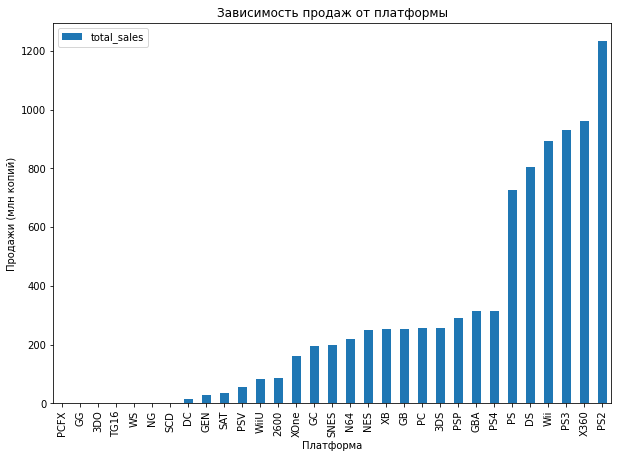

In [26]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='bar', figsize=(10, 7), title='Зависимость продаж от платформы').set(xlabel='Платформа', ylabel='Продажи (млн копий)')
plt.show()

Видно, что в топ-5 лидеров входят платформы DS, Wii, PS3, X360 и PS2. Построим для каждой из них распределение прибыли по годам:

In [27]:
top_5_platforms = df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(5).index.to_list()
top_5_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [28]:
top_5 = df[df['platform'].isin(top_5_platforms)].pivot_table(index=['platform', 'year_of_release'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')
top_5

eu_sales  jp_sales  na_sales  other_sales  \
platform year_of_release                                              
DS       1985                 0.00      0.02      0.00         0.00   
         2004                 3.93      3.65      8.33         1.36   
         2005                41.49     29.86     47.99        10.80   
         2006                23.07     38.56     50.01         8.17   
         2007                33.79     26.81     75.25        11.09   
         2008                32.24     24.01     78.12        10.94   
         2009                25.83     24.21     60.95         8.55   
         2010                18.82     19.86     40.80         5.54   
         2011                 5.71      4.32     14.27         1.88   
         2012                 2.68      3.72      4.02         0.59   
         2013                 0.85      0.00      0.57         0.12   
PS2      2000                10.64      8.87     16.08         3.58   
         2001                52.37     17.79     79.49        16.78   
         2002                65.27     21.85     96.54        21.72   
         2003                61.20     18.88     83.54        20.69   
         2004                56.01     19.17     96.78        39.85   
         2005                40.86     15.05     85.60        19.15   
         2006                21.61     17.64     49.93        14.24   
         2007                10.43      9.82     32.05        23.69   
         2008                 7.63      5.73     21.23        19.31   
         2009                 4.94      1.94      9.36        10.16   
         2010                 1.54      0.71      2.19         1.20   
         2011                 0.13      0.09      0.13         0.10   
PS3      2006                 7.38      1.08      8.84         3.66   
         2007                26.10      4.22     32.16        10.71   
         2008                38.73      5.82     57.23        16.74   
         2009                41.40      9.03     62.65        17.85   
         2010                50.50      9.87     60.99        20.81   
         2011                56.24     14.10     64.88        21.56   
         2012                39.04     11.94     39.88        16.49   
         2013                42.27     12.13     41.45        17.40   
         2014                18.24      6.25     16.39         6.88   
         2015                 6.04      3.67      4.99         2.12   
         2016                 1.26      1.30      0.67         0.37   
Wii      2006                43.62      9.15     70.86        13.52   
         2007                43.96     12.12     83.14        13.55   
         2008                46.52     12.69     97.12        14.99   
         2009                58.31     16.57    114.55        17.54   
         2010                36.31      8.78     72.64        10.22   
         2011                17.68      5.58     31.11         5.28   
         2012                 5.99      3.34     10.89         1.49   
         2013                 3.34      0.05      4.48         0.72   
         2014                 1.86      0.00      1.59         0.30   
         2015                 0.62      0.00      0.43         0.09   
         2016                 0.11      0.00      0.06         0.01   
X360     2005                 0.43      0.28      6.90         0.64   
         2006                10.84      1.20     35.16         4.42   
         2007                22.17      1.52     62.99         8.73   
         2008                38.16      1.89     82.51        12.70   
         2009                33.31      1.95     74.00        11.03   
         2010                46.31      2.11    107.38        14.23   
         2011                42.58      1.78     86.75        12.73   
         2012                32.00      1.06     58.39         8.29   
         2013                27.03      0.43     53.36         7.76   
         2014                11.28      0.08     2

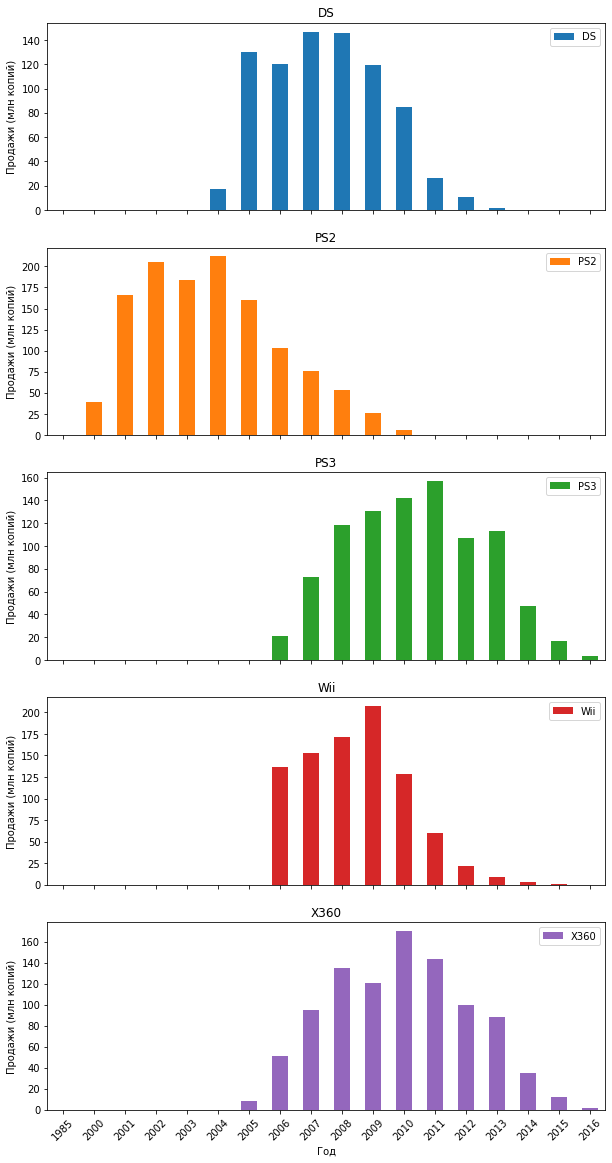

In [29]:
top_5.unstack(level=0).plot(kind='bar', y='total_sales', subplots=True, layout=(5, 1), rot=45, figsize=(10, 20), xlabel='Год', ylabel='Продажи (млн копий)')
plt.show()

Судя по графикам, можно заметить, что все платформы из списка топ-5 удерживают продажи в течение 9-10 лет, затем же продажи сводятся к нулю

В качестве актуального периода я выбрал временной промежуток с 2014 по 2016 год

In [30]:
actual_df = df[df['year_of_release'] >= 2014]
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


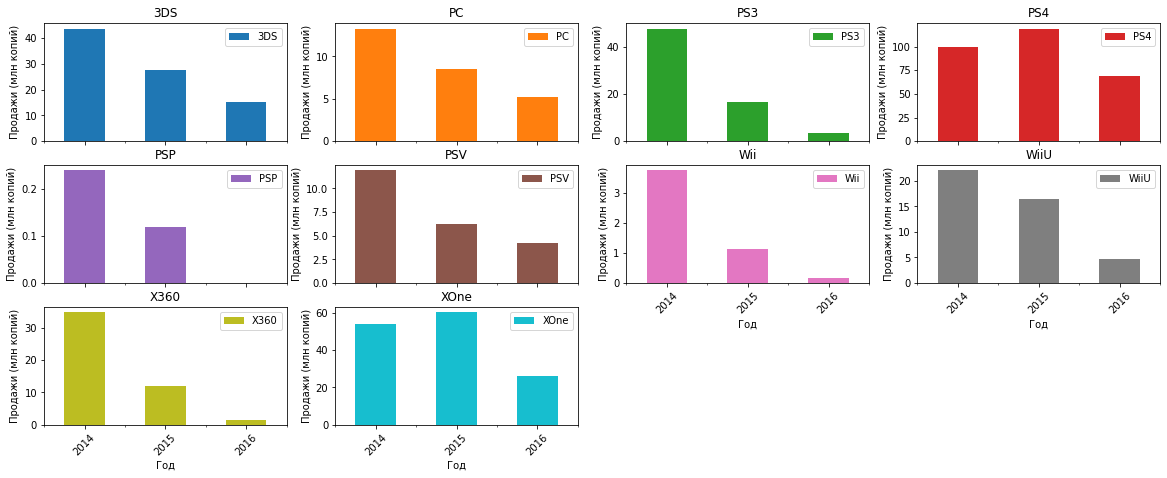

In [31]:
actual_df.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').unstack(level=0).plot(kind='bar', y='total_sales', rot=45, subplots=True, layout=(4, 4), figsize=(20, 10), xlabel='Год', ylabel='Продажи (млн копий)')
plt.show()

Из графиков можно сделать следующий вывод: игровые платформы, такие как 3DS, PSP, X360, PC, PS3, Wii, Wiiu на текущий момент совсем неактуальны, либо же теряют свою актуальность, то есть "пик" находится позади отметки в 2016 год. (В предположении мы проводим анализ в 2016 году)

Набирают популярность и лидируют следующие игровые платформы: PS4, PS5, XOne

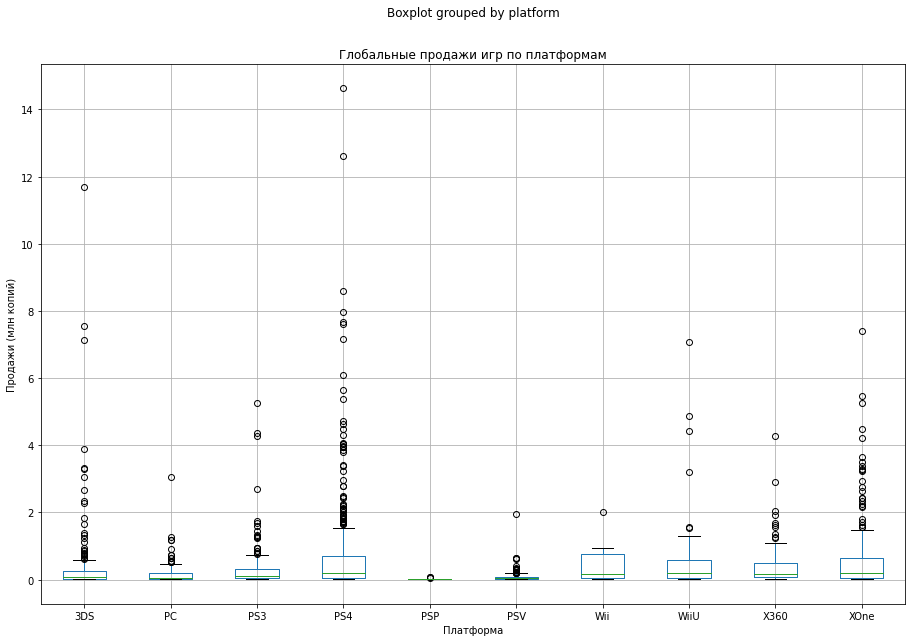

In [32]:
actual_df.boxplot(by='platform', column='total_sales', figsize=(15, 10)).set(xlabel='Платформа', ylabel='Продажи (млн копий)', title='Глобальные продажи игр по платформам')
plt.show()

Судя по графику можно заметить, медиана продаж у каждой платформы различна, хоть разница и не велика. Большего всего продаж у платформы PS4, XOne и Wiiu

Посмотрим, как влияют на продажи отзывы пользователей и критиков. В качестве платформ для сравнения выберем прибыльные и популярные платформы (PS3, PS4, X360 и XOne)

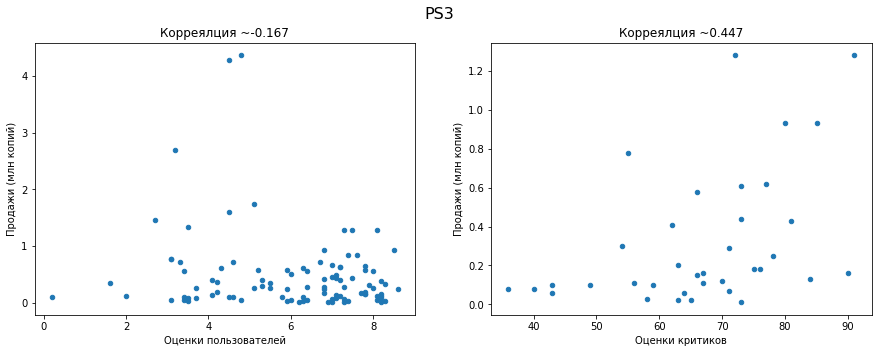

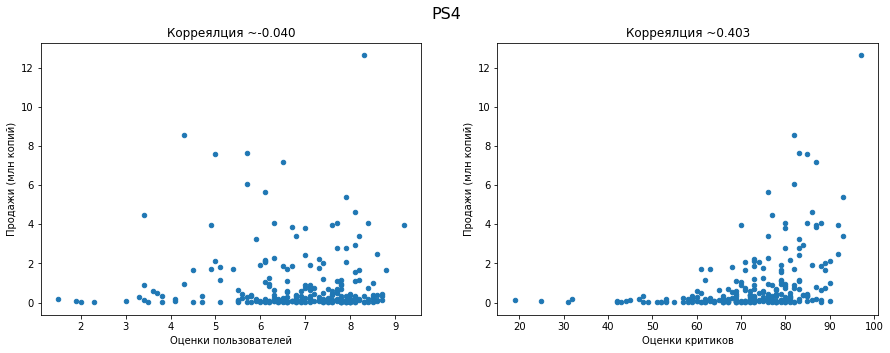

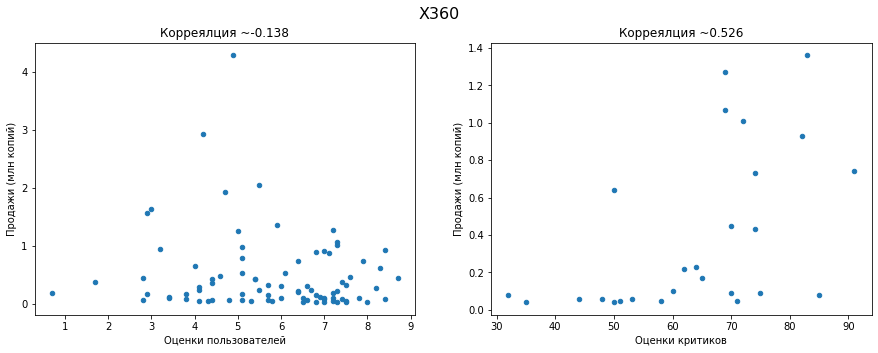

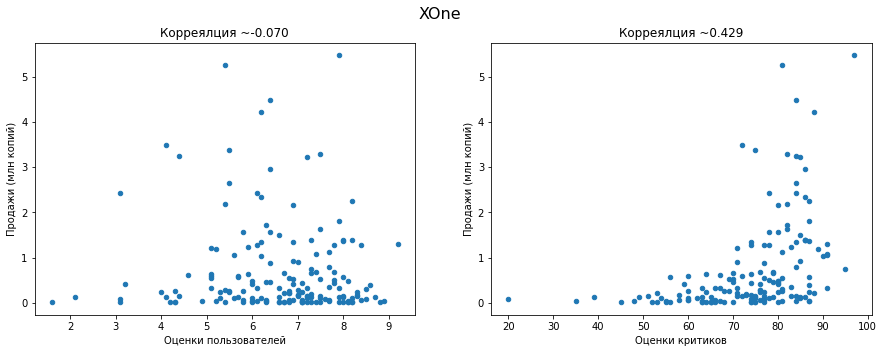

In [33]:
def get_corr(name_of_platform):
    tmp = actual_df[actual_df['platform'] == name_of_platform]
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(name_of_platform, fontsize=16)
    tmp.plot(ax=ax[0], figsize=(15, 5), kind='scatter', x='user_score', y='total_sales', title=f"Корреялция ~{tmp['user_score'].corr(tmp['total_sales']):.3f}", xlabel='Оценки пользователей', ylabel='Продажи (млн копий)')
    tmp.plot(ax=ax[1], figsize=(15, 5), kind='scatter', x='critic_score', y='total_sales', title=f"Корреялция ~{tmp['critic_score'].corr(tmp['total_sales']):.3f}", xlabel='Оценки критиков', ylabel='Продажи (млн копий)')
    plt.show()
    

get_corr('PS3')
get_corr('PS4')
get_corr('X360')
get_corr('XOne')

На всех представленных графиках есть закономерность: оценки пользователей почти никак не коррелируют с продаваемостью игр, а вот мнение критиков влияет - есть умеренная положительная корреляция между оценками критиков и продажами игр

Посмотрим на общее распределение игр по жанрам:

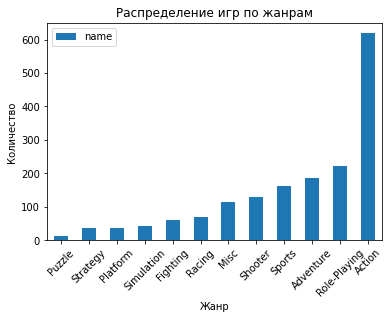

In [34]:
actual_df.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name').plot(kind='bar', title='Распределение игр по жанрам', xlabel='Жанр', rot=45, ylabel='Количество')
plt.show()

Самым "частым" жанром оказался жанр "Action", менее всего - жанр "Puzzle"

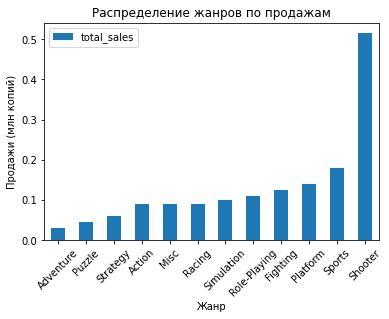

In [35]:
actual_df.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales').plot(kind='bar', rot=45, title='Распределение жанров по продажам', xlabel='Жанр', ylabel='Продажи (млн копий)')
plt.show()

Самыми прибыльными жанрами являются жанры "Shooter", "Sports" и "Platform"

Вывод по разделу:
    
    - актуальным периодом для прогноза на 2017 год был выбран период с 2014 года по 2016
    - в топ-3 лидеров по прибыльности входят платформы DS, Wii, PS3, X360 и PS2
    - среднее время "жизни" игровых платформ 9-10 лет
    - набирают популярность и лидируют следующие игровые платформы: PS4, PS5, XOne
    - нет сильной корреляции между продажами и отзывами пользователей, а ситуация с мнением критиков обратная: есть умеренная положительная корреляция, значит можно сказать, что покупатели больше ориентируются на мнение критиков
    - Самыми прибыльными жанрами являются жанры "Shooter", "Sports" и "Platform"

# 4) Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы и самые популярные жанры (топ-5):

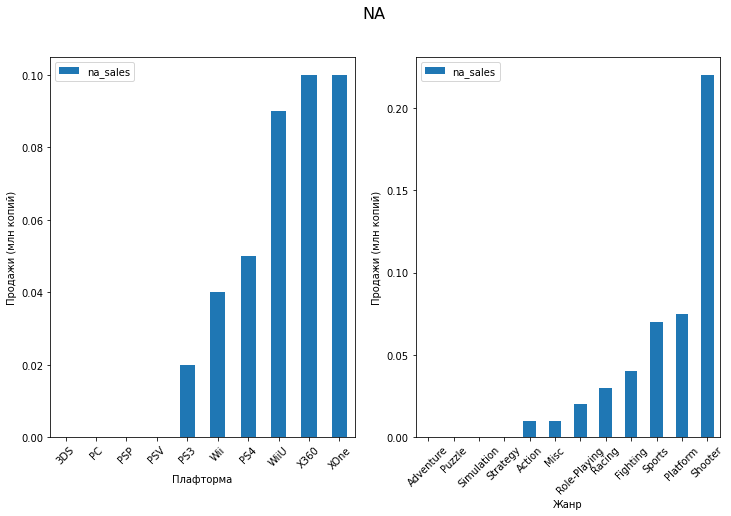

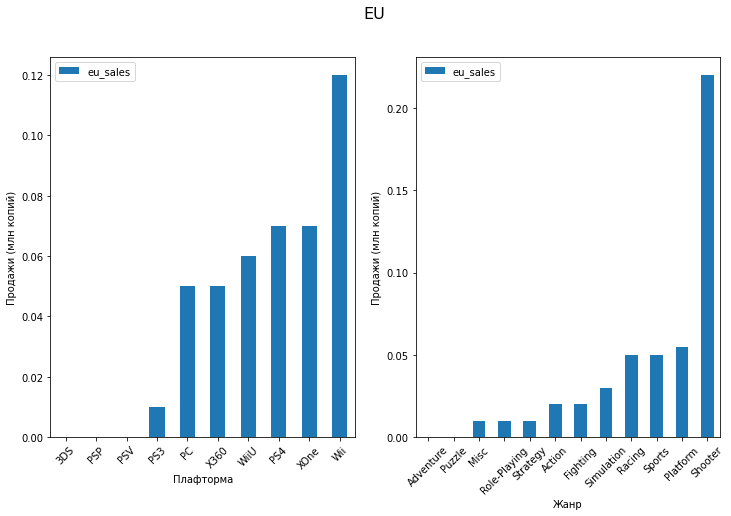

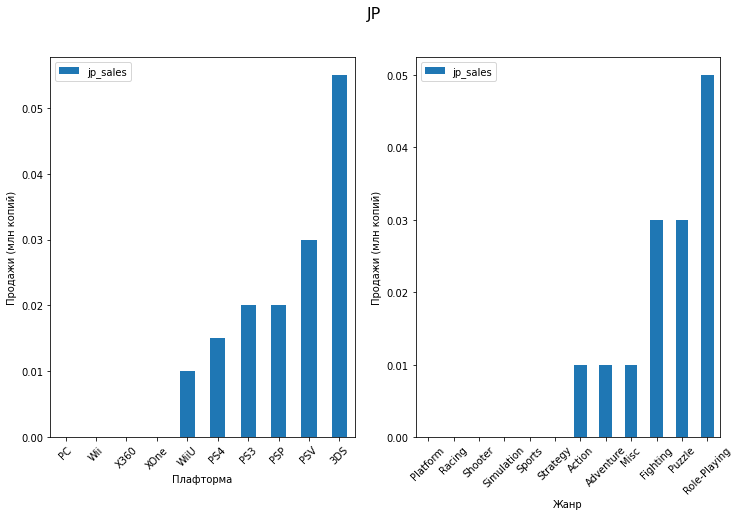

In [36]:
def top(region):
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(region.upper(), fontsize=16)
    
    actual_df.pivot_table(index='platform', values=region + '_sales', aggfunc='median').sort_values(region + '_sales').plot(figsize=(12, 7), ax=ax[0], rot=45, kind='bar', xlabel='Плафторма', ylabel='Продажи (млн копий)')
    actual_df.pivot_table(index='genre', values=region + '_sales', aggfunc='median').sort_values(region + '_sales').plot(figsize=(12, 7), ax=ax[1], rot=45, kind='bar', xlabel='Жанр', ylabel='Продажи (млн копий)')
    
    plt.show()
    
top('na')
top('eu')
top('jp')

1) Северная Америка:

    - топ-5 платформ => Wii, PS4, WiiU, X360, XOne
    - топ-5 жанров => Racing, Fighting, Sports, Platform, Shooter
    
2) Европа:

    - топ-5 платформ => X360, WiiU, PS4, XOne, Wii
    - топ-5 жанров => Simulation, Racing, Sports, Platform, Shooter
    
3) Япония:

    - топ-5 платформ => PS4, PS3, PSP, PSV, 3DS
    - топ-5 жанров => Adventure, Misc, Fighting, Puzzle, Role-Playing

Для начала заполним пропуски в столбце `rating` значением `RP` (рейтинг ожидается):

In [37]:
actual_df['rating'].fillna('RP', inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе:

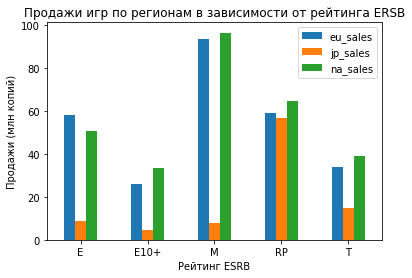

In [38]:
actual_df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(rot=0, kind='bar', xlabel='Рейтинг ESRB', ylabel='Продажи (млн копий)', title='Продажи игр по регионам в зависимости от рейтинга ERSB')
plt.show()

Рейтинг ESRB действительно влияет на продажи, особенно это видно на примере Японии - продажи там заметно ниже, чем в Европе или Северной Америке. К тому же можно заметить, что в Европе и Северной Америке примерно одинаковые продажи. Ещё хотелось бы отметить, что во всех регионах примерно равная продаваемость игр, у которых нет оценок от ESRB. Возможно именно после оценки ситуация с покупками этих игр изменится

Вывод по разделу:

    - В Северной Америке чаще всего играют в игры жанров Racing, Fighting, Sports, Platform, Shooter на платформах Wii, PS4, WiiU, X360, XOne
    
    - В Европе чаще всего играют в игры жанров Simulation, Racing, Sports, Platform, Shooter на платформах X360, WiiU, PS4, XOne, Wii
    
    - В Японимм чаще всего играют в игры жанров Adventure, Misc, Fighting, Puzzle, Role-Playing на платформах PS4, PS3, PSP, PSV, 3DS
    
    - Рейтинг ESRB влияет на уровень покупаемости игр

# 5) Проверка гипотез

Выдвинем нулевую гипотезу $H_0$ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые, тогда альтернативная гипотеза $H_1$ будет такова: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [39]:
alpha = 0.01

result = st.ttest_ind(actual_df[actual_df['platform'] == 'XOne']['user_score'], actual_df[actual_df['platform'] == 'PC']['user_score'], nan_policy='omit')

print(result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

0.10450507919348513
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value (~0.104) больше заданного уровня значимости, поэтому у нас нет оснований отвергнуть нулевую гипотезу

Выдвинем нулевую гипотезу $H_0$ - cредние пользовательские рейтинги жанров Action и Sports равны, тогда альтернативная гипотеза $H_1$ будет такова: cредние пользовательские рейтинги жанров Action и Sports не равны

In [40]:
alpha = 0.01

result = st.ttest_ind(actual_df[actual_df['genre'] == 'Action']['user_score'], actual_df[actual_df['genre'] == 'Sports']['user_score'], nan_policy='omit')

print(result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

2.8711147985107304e-19
Отвергаем нулевую гипотезу


Полученное значение p-value (~ $2.8 * 10^{-19}$) на порядки меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть большие основания склоняться к альтернативной гипотезе $H_1$: cредние пользовательские рейтинги жанров Action и Sports не равны

Для проверки обоих гипотез был применён метод ttest_ind, который позволяет проверить гипотезу о равенстве средних двух генеральных совокупностей. Так как оценки пользователей по жанрам и платформам не зависят друг от друга, количество оценок достаточно велико то использование этого метода теоретически обосновано

# 6) Общий вывод

Из открытых источников нам были доступны исторические данные о продажах игр в интернет-магазине «Стримчик», оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В ходе предобработки данных были обработаны пропуски (было отброшено ~1.6% исходных данных), данные приведены к правильным типам

В ходе исследовательского анализа были выявлены следующие факты:

    - актуальным периодом для прогноза на 2017 год был выбран период с 2014 года по 2016
    - в топ-3 лидеров по прибыльности входят платформы DS, Wii, PS3, X360 и PS2
    - среднее время "жизни" игровых платформ 9-10 лет
    - набирают популярность и лидируют следующие игровые платформы: PS4, PS5, XOne
    - нет сильной корреляции между продажами и отзывами пользователей, а ситуация с мнением критиков обратная: есть умеренная положительная корреляция, значит можно сказать, что покупатели больше ориентируются на мнение критиков
    - Самыми прибыльными жанрами являются жанры "Shooter", "Sports" и "Platform"
    
Следующим этапом анализа было построение портрета пользователя по регионам (NA, EU, JP):

    - В Северной Америке чаще всего играют в игры жанров Racing, Fighting, Sports, Platform, Shooter на платформах Wii, PS4, WiiU, X360, XOne
    
    - В Европе чаще всего играют в игры жанров Simulation, Racing, Sports, Platform, Shooter на платформах X360, WiiU, PS4, XOne, Wii
    
    - В Японимм чаще всего играют в игры жанров Adventure, Misc, Fighting, Puzzle, Role-Playing на платформах PS4, PS3, PSP, PSV, 3DS
    
    - Рейтинг ESRB влияет на уровень покупаемости игр
    
    - Рейтинг ESRB влияет на уровень покупаемости игр
    
В заключительном этапе были проверены следующие гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые `(не опровергнута)`:
    
Полученное значение p-value (~0.104) больше заданного уровня значимости (0.01), поэтому нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC не равны
    
2) Средние пользовательские рейтинги жанров Action и Sports разные `(не опровергнута)`:

Полученное значение p-value (~$2.8 * 10^{-19}$) на порядки меньше заданного уровня значимости (0.01), поэтому есть большие основания утверждать, что cредние пользовательские рейтинги жанров Action и Sports не равны